read the data in and do a couple of clean up tasks. I think you all have a more robust clean up technique.

In [1]:
#import the data
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/bsnxw01/Desktop/MSDS_Program/MSDS_7331/Project/Lab1/DataMiningGroupProjects/Project1/Input/DefaultCreditcardClients.csv')
df.rename(columns={'default payment next month':'default'}, inplace=True)
#df.dtypes

# Change numeric values to floats
continuous_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                       'PAY_AMT6']
#ordinal_features = ['EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
#categ_features = ['ID', 'SEX', 'default'];
df[continuous_features] = df[continuous_features].astype(np.float64)

#convert any non-identified education categories to 'OTHER'
df['EDUCATION'] = df['EDUCATION'].replace(to_replace=(0,5,6),value=4)

#convert any non-identified marriage categories to 'OTHER'
df['MARRIAGE'] = df['MARRIAGE'].replace(to_replace=(0),value=3)

#calculate the credit usage values
df['USAGE_1'] = df['BILL_AMT1']/df['LIMIT_BAL']
df['USAGE_2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['USAGE_3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['USAGE_4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['USAGE_5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['USAGE_6'] = df['BILL_AMT6']/df['LIMIT_BAL']


payments = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df['TotalMonthsLate'] = df[payments].sum(axis=1)

#transform continuous variables as they each have a mostly exponential distribution
df[continuous_features] = df[continuous_features].replace(to_replace=0,value=np.nan).apply(np.log)

df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default,USAGE_1,USAGE_2,USAGE_3,USAGE_4,USAGE_5,USAGE_6,TotalMonthsLate
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,23297.000000,22827.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,11.663002,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,7.765351,7.794879,0.221200,0.423771,0.411128,0.392192,0.359503,0.333108,0.318585,-1.094633
std,8660.398374,0.941135,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,1.347209,1.357764,0.415062,0.411462,0.404555,0.396449,0.368686,0.350542,0.345301,5.893055
min,1.000000,9.210340,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,-0.619892,-1.395540,-1.025100,-1.374500,-0.876743,-1.509530,-12.000000
25%,7500.750000,10.819778,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,6.907755,6.907755,0.000000,0.022032,0.018318,0.016030,0.014299,0.011133,0.007800,-5.000000
50%,15000.500000,11.849398,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,7.740664,7.777374,0.000000,0.313994,0.296057,0.273135,0.242066,0.212026,0.185224,0.000000
75%,22500.250000,12.388394,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,8.517193,8.517593,0.000000,0.829843,0.806500,0.755107,0.667937,0.602245,0.582169,0.000000
max,30000.000000,13.815511,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,12.963436,13.178112,1.000000,6.455300,6.380500,10.688575,5.146850,4.935500,3.885550,36.000000


### Explore Attributes and Class

_Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification)._

In this section we review the various relationships between our various features and there relationship to our target class (default =1). This will allow us to understand certain features or potentially identify new features for use in our model.

We began by exploring the relationships between the available demographic data to the default class.


##### _Customer Demographics and Default_

In [2]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

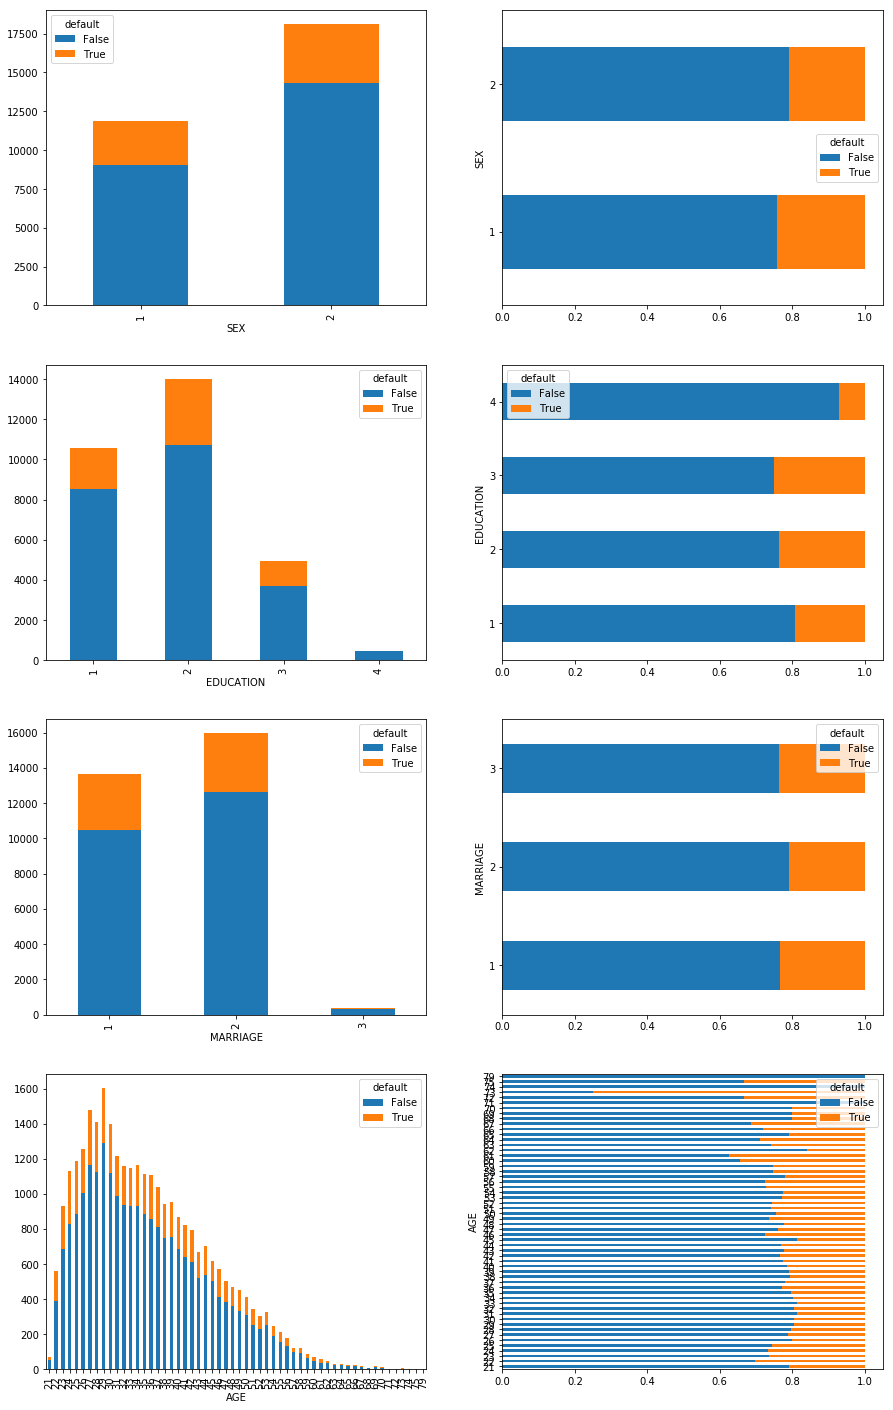

In [3]:
# cross tabs provide a quick view of the relationships between characteristics of the borrower & our target
plotVar = ['SEX','EDUCATION','MARRIAGE','AGE']

fig, axes = plt.subplots(nrows=len(plotVar), ncols=2, figsize=(15, 25))

for fi,feature in enumerate(plotVar):
    Counts = pd.crosstab(df[feature],df.default.astype(bool))
    Counts.plot(kind='bar', stacked=True, ax=axes[fi,0])
    
    Rate = Counts.div(Counts.sum(1).astype(float),axis=0)
    Rate.plot(kind='barh', stacked=True, ax=axes[fi,1])
    
plt.show()


After reviewing the features from above there are a couple relationships that stand out when comparing the demographic features and the proportion of defaults for our sample. The review of this data below simply addresses the variable relationships to the default class. It does not address the potential ethical concerns of using a customer's demographic information to influence a banks decision on credit limits or interest rates.

Sex
- There does appear to be a noticeable difference in the default rates by gender based on a visual inspections. 

Education
- There does seem to pattern between the amount of education people receive and the default rates. Based on the visual inspection of the above data there is some indication that people with higher levels of education default at lower rates.

Marriage
- There does not seem to be any obvious discernable trends based on Marital Status

Age:
- Based on the age variables there is potentially some indications that people in there early 20's are more succeptible to defaulting, however this variable may need to be bucketed differently to better interpret the succeptible age groups. We will cover this in our 'New Features' section.


##### _Payment History and Default_

After looking through the customers demographic history we wanted to explore the relationships between the customers bill payment history to identify any patterns that emerge.

We begin with the relationship between prior payment status (late payments vs ontime)

Text(0,0.5,'Average Months Behind Payment Due Date')

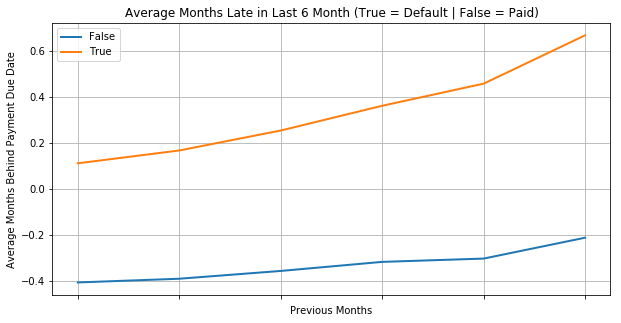

In [4]:
plotVar = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Months Late in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Months Behind Payment Due Date')

From above the customers that defaulted paid there previous bill between .2 to .7 months late on average. Additionally, it appears that as we move closer to the month we are predicting(left to right), the timeliness of the bill payments seems to be getting worse for both groups.

Logically we interpret this to support the notion that people who have trouble paying there previous bills will likely have similar difficulties paying in the future. 

This lends to the potential for a new features that better captures the timeliness of previous payments as well as the status of the last payment (paid or still outstanding).

In order to understand why, we will look at the average of the log transformed bill amounts to see if there is any identifiable pattern.

Text(0,0.5,'Average Log(Bill Amt)')

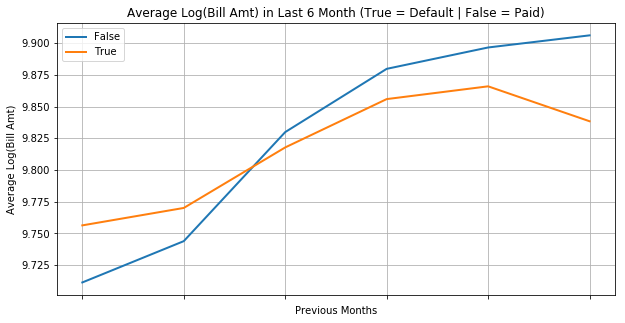

In [5]:
plotVar = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Log(Bill Amt) in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Log(Bill Amt)')

Interestingly, when looking at the bill amount from the previous months there does not seem to be a considerable difference between the median bill amount between customers that default and those that don't. 

Based on this it would seem that the actual bill amount by itself will offer little insight into the likelihood of default. This is perhaps an indication that it should be considered relative to the total available credit and the prior payments. 

Next we look deeper that log transformed payment amounts.

Text(0,0.5,'Average Log(Pay Amt)')

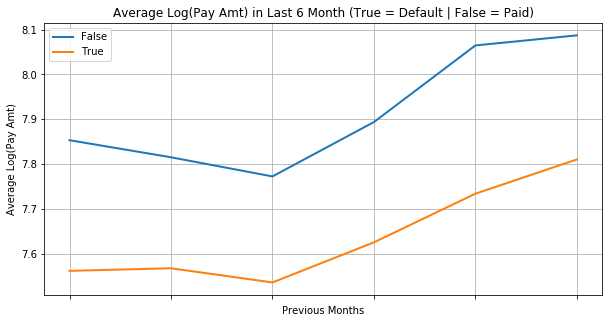

In [6]:
plotVar = ['PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default']
plotDF = df[plotVar]

meanDF = plotDF.groupby(by='default').mean().T.reset_index()
meanDF['Month'] = [9,8,7,6,5,4]
meanDF.columns = ['PreviousMonths', 'False', 'True', 'Month']
meanDF = meanDF.sort_values(by=['Month'], ascending=True)

meanDF.plot(x='PreviousMonths', y=['False', 'True'], figsize=(10,5), grid=True, lw = 2)
plt.title('Average Log(Pay Amt) in Last 6 Month (True = Default | False = Paid)')
plt.xlabel('Previous Months')
plt.ylabel('Average Log(Pay Amt)')

There does appear to be a difference in the median payment amount between the customers that defaulted and those that did not. 

It appears that customers that did not default make higher payments against there credit on average than those that do default. 

This leads us to question if customers that default are paying less, but maintain a similar bill amount then they are likely using a higher proportion of there credit. We will introduce a new feature that will measure the customer's credit usage in the 'New Features' section.

##### _Summary_

Based on the reviews of the features above it appears that we have several features that have a relationship to our target class. Additionally, we identified several limitations of our current features and have decided to include a several new features that could potentially improve our model.

### New Features

_Are there other features that could be added to the data or created from existing features? Which ones?_


Based on the above analysis we believe we idenfied several new features that we will derive from our existing data. Below we explain the variable and the code used to create it.

##### _Bucketed Age Group_

This will allow us to pick up some of the traits of different age groups and life events. For example young adults (21-28) will likely have a different financial situation than a retiree.


In [ ]:
# Creating Age Buckets
df['Agegroup'] = df['AGE']//10

##### _Credit Usage History_ 

Using the billed amounts relative to the total available credit for each of the customers gives us information on how much available credit they are using and carrying over month to month. This feature will allow us to determine how high consistently high credit usage effects a customer's likelihood of defaulting.

In [ ]:
#calculate the credit usage values
df['USAGE_1'] = df['BILL_AMT1']/df['LIMIT_BAL']
df['USAGE_2'] = df['BILL_AMT2']/df['LIMIT_BAL']
df['USAGE_3'] = df['BILL_AMT3']/df['LIMIT_BAL']
df['USAGE_4'] = df['BILL_AMT4']/df['LIMIT_BAL']
df['USAGE_5'] = df['BILL_AMT5']/df['LIMIT_BAL']
df['USAGE_6'] = df['BILL_AMT6']/df['LIMIT_BAL']

##### _Late Payments Total_ 

How many times has a customer been late on a payment in the last six months? We saw in the section above that a history of late payments does appear to have a strong relationship with our target variable default.

In [ ]:
transformVar = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for fi,feature in enumerate(transformVar):
    df[feature] = pd.cut(df[feature], [-3,-1,8], 2, labels=[0,1]).astype(np.int64)

df['TotalMonthsLate'] = df[transformVar].sum(axis=1)
